In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
dataset = pd.read_csv(r"C:\Users\mehre\OneDrive\Desktop\college\Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
labels=set(dataset['Species'])
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [10]:
le=LabelEncoder()
dataset['Species']=le.fit_transform(dataset['Species'])

In [11]:
X=dataset.iloc[:,1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
Y= dataset.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [14]:
X_train.shape

(120, 4)

In [15]:
X_test.shape

(30, 4)

In [16]:
precision = []
recall = []
fscore = []
accuracy = []

In [17]:
def calculateMetrics(algorithm,predict,testY):
    testY =testY.astype('int')
    predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy : '+str(a))
    print(algorithm+' Precision : '+str(p))
    print(algorithm+' Recall : '+str(r))
    print(algorithm+' FSCORE : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict)
    plt.figure(figsize =(5, 5))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels,annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

KNN Classifier Accuracy : 100.0
KNN Classifier Precision : 100.0
KNN Classifier Recall : 100.0
KNN Classifier FSCORE : 100.0

 KNN Classifier classification report
                  precision    recall  f1-score   support

Iris-versicolor       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



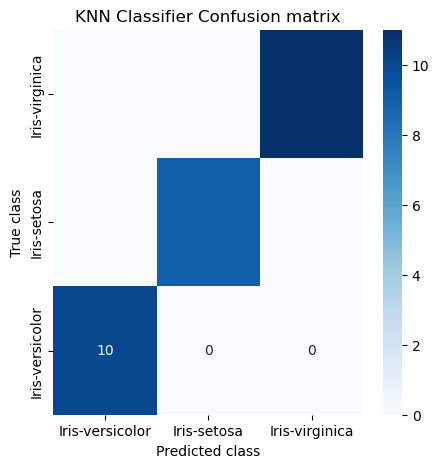

In [18]:
if os.path.exists('KNN_weights.pkl'):
    classifier= joblib.load('KNN_weights.pkl')
    predict = classifier.predict(X_test)
    calculateMetrics("KNN Classifier", predict, Y_test)
else:
    classifier = KNeighborsClassifier(weights='distance',algorithm='ball_tree',leaf_size=3,p=1,metric='minkowski',)
    classifier.fit(X_train, Y_train)
    predict=classifier.predict(X_test)
    joblib.dump(classifier, 'KNN_weights.pkl')
    print("KNN classifier_model trained and model weights saved.")
    calculateMetrics("KNeighborsClassifier", predict, Y_test)

LogisticRegression_weights.pkl Accuracy : 100.0
LogisticRegression_weights.pkl Precision : 100.0
LogisticRegression_weights.pkl Recall : 100.0
LogisticRegression_weights.pkl FSCORE : 100.0

 LogisticRegression_weights.pkl classification report
                  precision    recall  f1-score   support

Iris-versicolor       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



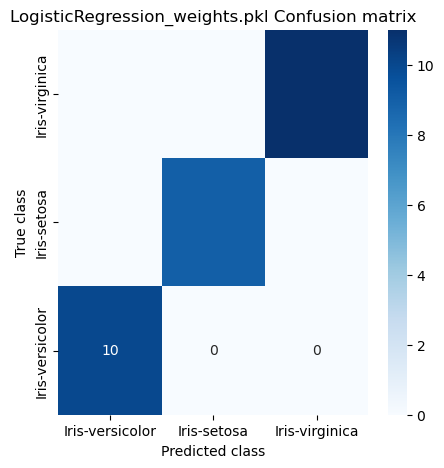

In [19]:
if os.path.exists('LogisticRegression_weights.pkl'):
    clf = joblib.load('LogisticRegression_weights.pkl')
    predict=clf.predict(X_test)
    calculateMetrics("LogisticRegression_weights.pkl", predict, Y_test)
else:
    clf = LogisticRegression()
    clf.fit(X_train, Y_train)
    predict=clf.predict(X_test)
    joblib.dump(clf, 'LogisticRegression_weights.pkl')
    print("LogisticRegression model trained and model weights saved.")
    calculateMetrics("LogisticRegression", predict, Y_test)

In [21]:
A="Iris-setosa"
B="Iris-versicolor"
C="Iris-virginica"

dataset = pd.read_csv(r"C:\Users\mehre\OneDrive\Desktop\test.csv")
predict = classifier.predict(dataset)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(dataset.iloc[i,:],A))
    elif predict[i]== 1:
        print("{} :{} ".format(dataset.iloc[i, :],B))
    elif predict[i]== 2:
        print("{} :{} ".format(dataset.iloc[i, :],C))

SepalLengthCm    5.1
SepalWidthCm     3.5
PetalLengthCm    1.4
PetalWidthCm     0.2
Name: 0, dtype: float64 :Iris-setosa 
SepalLengthCm    4.9
SepalWidthCm     3.0
PetalLengthCm    1.4
PetalWidthCm     0.2
Name: 1, dtype: float64 :Iris-setosa 
SepalLengthCm    4.7
SepalWidthCm     3.2
PetalLengthCm    1.3
PetalWidthCm     0.2
Name: 2, dtype: float64 :Iris-setosa 
SepalLengthCm    4.6
SepalWidthCm     3.1
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 3, dtype: float64 :Iris-setosa 
SepalLengthCm    5.6
SepalWidthCm     2.7
PetalLengthCm    4.2
PetalWidthCm     1.3
Name: 4, dtype: float64 :Iris-versicolor 
SepalLengthCm    5.7
SepalWidthCm     3.0
PetalLengthCm    4.2
PetalWidthCm     1.2
Name: 5, dtype: float64 :Iris-versicolor 
SepalLengthCm    5.7
SepalWidthCm     2.9
PetalLengthCm    4.2
PetalWidthCm     1.3
Name: 6, dtype: float64 :Iris-versicolor 
SepalLengthCm    6.2
SepalWidthCm     2.9
PetalLengthCm    4.3
PetalWidthCm     1.3
Name: 7, dtype: float64 :Iris-versicolor 
SepalLen